# Wrinkled Multilayer abTEM Simulation
This notebook builds a wrinkled multilayer using `utils_bending.py` and runs an abTEM simulation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import abtem
from ase.io import read
from utils_bending import make_monolayer, build_wrinkled_multilayer


In [10]:
# === Parameters ===
cif_path = "/Users/danielkh/Documents/Nadja/Na_PHI_model_2/NA_PHI_model_2.cif"  # <-- Replace with actual path
width, height = 6, 6

# Structure
num_layers = 30
layer_spacing = 3.3668

# Wrinkle parameters
wavelength_coeff = 2
amplitude = 0.5
axis = "y"

# Rotation
rotation = 5  # Degrees
random_rotation = False

# Random waves
random_wave = False
random_amplitude = False

# Seed
seed = 42


In [11]:
# Load CIF and make monolayer
monolayer = make_monolayer(width, height, cif_path,remove_na=True)
cif_base = read(cif_path)
unitcell_length = cif_base.cell[0][0]
wavelength = unitcell_length * wavelength_coeff


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='z [Å]'>)

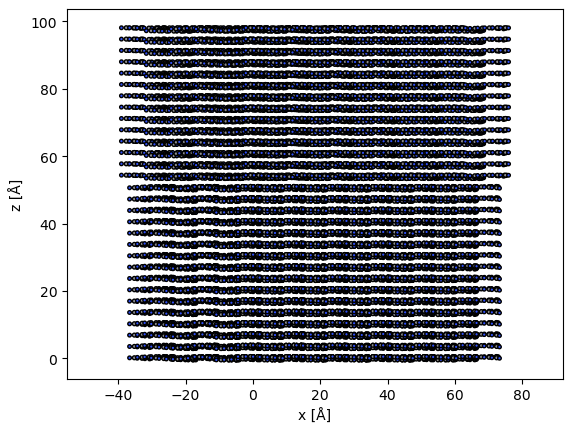

In [12]:
# Build full multilayer
stacked_atoms = build_wrinkled_multilayer(
    monolayer=monolayer,
    num_layers=num_layers,
    layer_spacing=layer_spacing,
    amplitude=amplitude,
    wavelength=wavelength,
    axis=axis,
    rotation=rotation,
    random_rotation=random_rotation,
    random_wave=random_wave,
    random_amplitude=random_amplitude,
    seed=seed
)

abtem.show_atoms(stacked_atoms, 'xz', show_cell=False)


In [16]:
# === abTEM Simulation ===
import abtem

# Optional: rotate and center structure
angle = 90  # in degrees
structure = stacked_atoms.copy()
structure.rotate('y', angle, center="COM")
structure.center(vacuum=100)

# Optional: Frozen phonons (commented out)
# frozen_phonons = abtem.FrozenPhonons(structure, 10, sigmas=0.5)

# Create potential
potential = abtem.Potential(
    structure,  # or frozen_phonons
    gpts=1024,
    projection="finite",
    slice_thickness=1,
    periodic=True,
)

# Create probe and match grid
wave = abtem.Probe(energy=200e3, semiangle_cutoff=0.2)
wave.grid.match(potential)

# Run multislice simulation and compute diffraction
measurement = wave.multislice(potential).diffraction_patterns(max_angle=30)
Diffraction_multilayer = measurement.compute()



[########################################] | 100% Completed | 40.10 ss


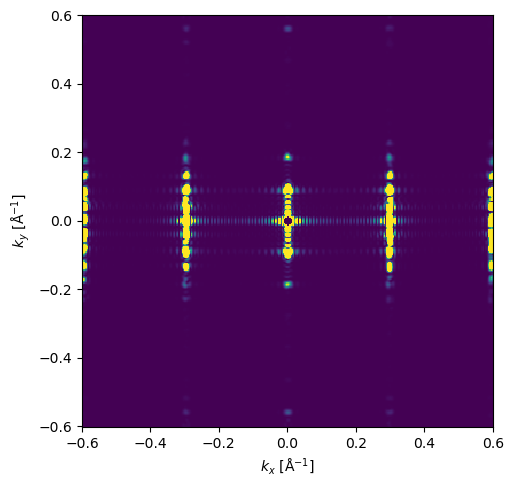

In [18]:
Diffraction_multilayer.block_direct().crop(15).show(vmax=1e-5)